In [102]:
%reload_ext autoreload
%autoreload 2
%reload_ext notexbook
%texify -cdfs 16 -mdfs 18 -fs 20

#### Variational autoencoder

In [103]:
import torch
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torchvision import transforms
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl
%matplotlib inline

#### Equations


\begin{equation*}
p_{\theta} = \int_\mathbf{z} p_{\theta}(\mathbf{x}, \mathbf{z}) 
\end{equation*}

$$
    p_{\theta} = \int_\mathbf{z} p_{\theta}(\mathbf{x} | \mathbf{z}) p_\theta(\mathbf{z})d\mathbf{z}
$$


###### Prior
$$ p_{\theta}(\mathbf{z})$$

###### Likelihood
$$ p_{\theta}(\mathbf{x} | \mathbf{z}) $$

###### Posterior
$$ p_{\theta} (\mathbf{z} | \mathbf{x}) $$


$p_{\theta}$ is not easy to calculated. It is necessary to introduce further approzimation $ q_{\phi} (\mathbf{z} | \mathbf{x}) \approx p_{\theta} (\mathbf{z} | \mathbf{x})$

$\phi$ defines set of real values that parametrize q.


The overall problem can be translated into autoencoder domane, where conditional likelihood distribution $ p_{\theta}(\mathbf{x} | \mathbf{z}) $ estimation is done by the decoder while the approzimated posterior distribution $q_{\phi} (\mathbf{z} | \mathbf{x})$ is estimated by the encoder.


#### ELBO loss function

In [66]:
dataset_train = MNIST(root='./data/', train=True, download=True,
                      transform=transforms.ToTensor())

In [67]:
dataset_test = MNIST(root='./data/', train=False)

In [68]:
(image, target) = dataset_train[0]

In [81]:
grid = make_grid([dataset_train[i][0] for i in range(64)], nrows=8)

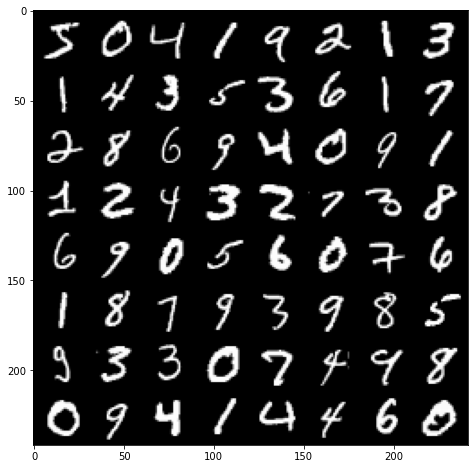

In [83]:
plt.figure(figsize=(8,8))
plt.imshow(TF.to_pil_image(grid))